In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\Admin\Desktop\Dataset\Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Data_Description

label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn : mobile number of user

aon : age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date


In [3]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [4]:
#check null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

so, as per above details we don't have any null value in this dataset

In [5]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [6]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


 As per above Observations:-
   1.Aon has outliers as max value is too high and min value is negative which is not possible, 
   2.for all the features we can see that the min value is negative which is not even possible for most of the features like daily recharge and main account balance, and last recharge can't be negative.

In [7]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## EDA

In [8]:
df.shape

(209593, 36)

In [9]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

<AxesSubplot:xlabel='label', ylabel='count'>

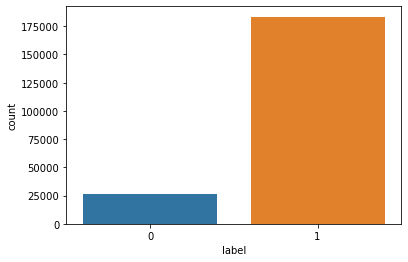

In [12]:
import seaborn as sns
sns.countplot(x='label', data=df)

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

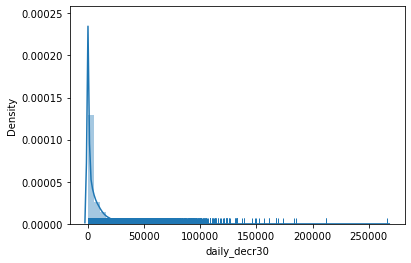

In [13]:
import seaborn as sns
sns.distplot(df['daily_decr30'],rug=True)

#lets setup the bin values to know where the values lie

In [14]:
import numpy as np
bin_values = np.arange(start=-100, stop=1000, step=100)
print(bin_values)

[-100    0  100  200  300  400  500  600  700  800  900]


<AxesSubplot:>

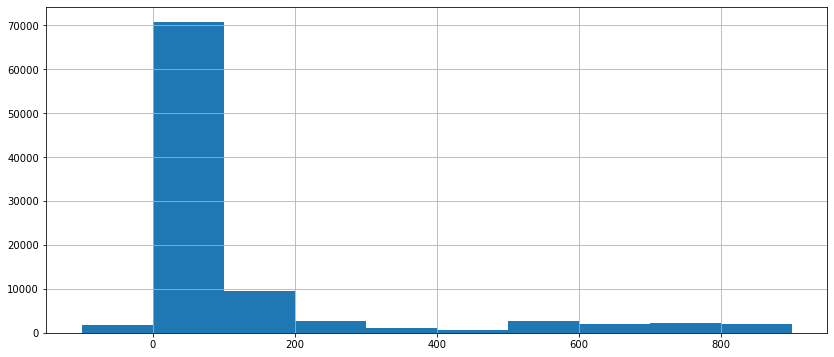

In [15]:
df['daily_decr30'].hist(bins=bin_values, figsize=[14,6])

In [16]:
#Creating balance Groups for our visiualization
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [17]:
# Mapping balance groups with precentage value with respect to label 
count_balance_response = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum()*100)
count_balance_response = count_balance_response.transpose()

In [18]:
count_balance_response

label,0,1
balance_group,,
average balance,9.436834,90.563166
high balance,0.000000,100.000000
low balance,11.276328,88.723672
no balance,30.710929,69.289071


In [19]:
bal = pd.DataFrame(df['balance_group'].value_counts())
bal['subscription%'] = count_balance_response[1]
bal.drop('balance_group',axis=1,inplace=True)
bal['bal']= [1,0,2,3]
bal = bal.sort_values('bal',ascending = True)
bal

,subscription%,bal
no balance,69.289071,0
low balance,88.723672,1
average balance,90.563166,2
high balance,100.000000,3


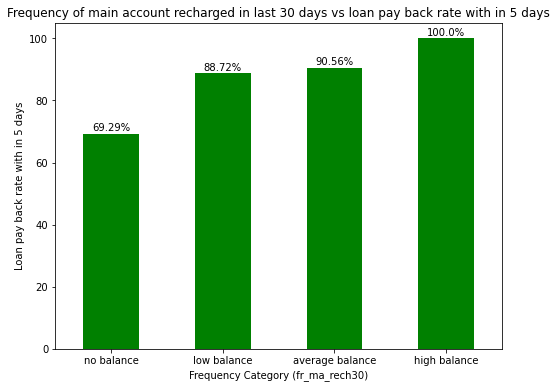

In [20]:
## Plotting the graph
plot_fre = bal['subscription%'].plot(kind = 'bar',
                                               color = ('Green'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      bal['subscription%'].round(2).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Observation:-<br>
  1.Users with high balance always pays back the loan within 5 days <br>
  2.Average and low category only 9% - 12% users failed to payback the loan within 5%<br>
  3.users with zero balance around 30% users are not paying the loan back within 5 days.

In [21]:
#Creating Frequency Groups for our visiualization
lst1 = [df]
for column in lst1:
    column.loc[column['fr_ma_rech30'] <=0, 'frequency_group'] = 'no_frequency'
    column.loc[(column['fr_ma_rech30'] >0) & (column['fr_ma_rech30'] >=1), 'frequency_group'] = 'low_frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] >=2), 'frequency_group'] = 'avg_frequency'
    column.loc[column['fr_ma_rech30'] >2, 'frequency_group'] = 'high_frequency'

In [22]:
#mapping the frequency groups
count_freq_response=pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum()*100)
count_freq_response=count_freq_response.transpose()
count_freq_response

label,0,1
frequency_group,,
avg_frequency,3.787999,96.212001
high_frequency,5.481040,94.518960
low_frequency,4.304873,95.695127
no_frequency,24.870684,75.129316


In [23]:
##Creating seperate samll dataframe for visualization
freq= pd.DataFrame(df['frequency_group'].value_counts())
freq['subs%']= count_freq_response[1]
freq.drop('frequency_group', axis=1, inplace= True)
freq['Freq'] = [3,0,1,2]
freq = freq.sort_values('Freq', ascending= True)
freq

,subs%,Freq
no_frequency,75.129316,0
low_frequency,95.695127,1
avg_frequency,96.212001,2
high_frequency,94.518960,3


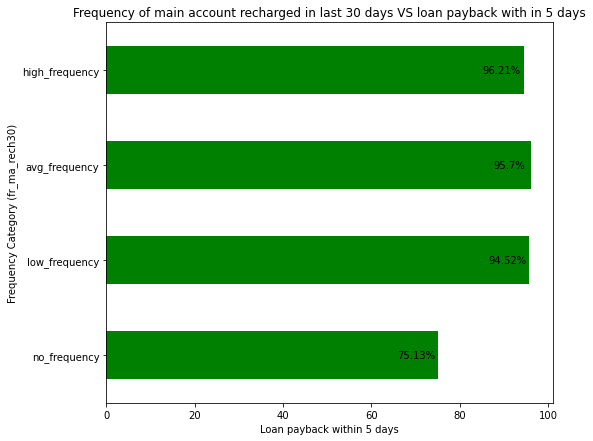

In [24]:
## plotting the graph
plot_freq = freq['subs%'].plot(kind='barh', color = ('Green'), figsize = (8,7))
plt.title('Frequency of main account recharged in last 30 days VS loan payback with in 5 days')
plt.ylabel('Frequency Category (fr_ma_rech30)')
plt.xlabel('Loan payback within 5 days')
plt.xticks(rotation= 'horizontal')
## Labeling the bar
for re, label in zip(plot_freq.patches,freq['subs%'].sort_values(ascending = True).round(2).astype(str)):
    plot_freq.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'black')
    

Observation:-<br>
1.There is no 100% rate in any frequency group to payback the loan within 5 days<br>
2.All average low and high frequency have atleast 6% to 4% users didn't payback the loan within 5 days.<br>
3.Comming to user have no frequency 25% users didn't payback the loan with in 5 days <br>
4.till now we can see that users with no balance and no frequency are costing huge losses, company should implement some kind of strategies to reduce that like send SMS alerts for notification.

In [25]:
## Creating Frequency Group for number of loan amounts
lst2= [df]
for column in lst2:
    column.loc[column['cnt_loans30'] <=0, 'loan_freq_group'] = 'no_loan'
    column.loc[(column['cnt_loans30'] >0) & (column['cnt_loans30'] <=1), 'loan_freq_group'] = 'low_loan'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_freq_group'] = 'avg_loan'
    column.loc[(column['cnt_loans30'] >4), 'loan_freq_group'] = 'high_loan'

In [26]:
## mapping the laon Frequency groups to dataframe
count_loan_response=pd.crosstab(df['label'],df['loan_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan_response=count_loan_response.transpose()
count_loan_response

label,0,1
loan_freq_group,,
avg_loan,6.401495,93.598505
high_loan,1.619592,98.380408
low_loan,23.972816,76.027184
no_loan,0.000000,100.000000


In [27]:
##Creating seperate samll dataframe for visualization
loan_freq = pd.DataFrame(df['loan_freq_group'].value_counts())
loan_freq['subs%'] = count_loan_response[1]
loan_freq.drop('loan_freq_group',axis=1, inplace=True)
loan_freq['freq']=[2,3,1,0]
loan_freq=loan_freq.sort_values('freq',ascending = True)

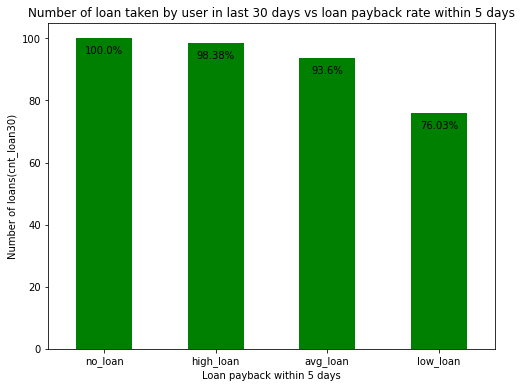

In [28]:
## plotting the graph
plot_freq1= loan_freq['subs%'].plot(kind= 'bar', color = ('Green'), figsize=(8,6))
plt.title('Number of loan taken by user in last 30 days vs loan payback rate within 5 days')
plt.xlabel('Loan payback within 5 days')
plt.ylabel('Number of loans(cnt_loan30)')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq1.patches,
                    loan_freq['subs%'].round(2).astype(str)):
    plot_freq1.text(re.get_x() + re.get_width()/2,
                   re.get_height()-5,
                    label+'%',
                    ha='center',
                    color='black')
                   


Observation:- <br>
1.Majority user who took high loans in last 30 days are more likely to payback with in 5 days <br>
2. 1.62% users failed to payback within 5 days<br>
3.among average loan user 7% users failed to payback the loan within 5 days <br>
4.users with low loan have 24% didn't payback as expected might be defaulted.<br>

In [29]:
## Creating Frequency Group for number of loan amounts in 90 days
lst3= [df]
for column in lst3:
    column.loc[column['amnt_loans90'] <=0, 'loan90_freq_group'] = 'no_loan'
    column.loc[(column['amnt_loans90'] >0) & (column['amnt_loans90'] <=6), 'loan90_freq_group'] = 'low_loan'
    column.loc[(column['amnt_loans90'] >6) & (column['amnt_loans90'] <=30), 'loan90_freq_group'] = 'medium_loan'
    column.loc[column['amnt_loans90'] >30, 'loan90_freq_group'] = 'high_loan'

In [30]:
## mapping the laon Frequency groups to dataframe
count_loan90_response=pd.crosstab(df['label'],df['loan90_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan90_response=count_loan90_response.transpose()
count_loan90_response

label,0,1
loan90_freq_group,,
high_loan,1.432771,98.567229
low_loan,27.262733,72.737267
medium_loan,7.197224,92.802776
no_loan,0.000000,100.000000


In [31]:
##Creating seperate samll dataframe for visualization
loan90_freq = pd.DataFrame(df['loan90_freq_group'].value_counts())
loan90_freq['subs%'] = count_loan_response[1]
loan90_freq.drop('loan90_freq_group',axis=1, inplace=True)
loan90_freq['freq']=[3,1,2,0]
loan90_freq=loan_freq.sort_values('freq',ascending = True)

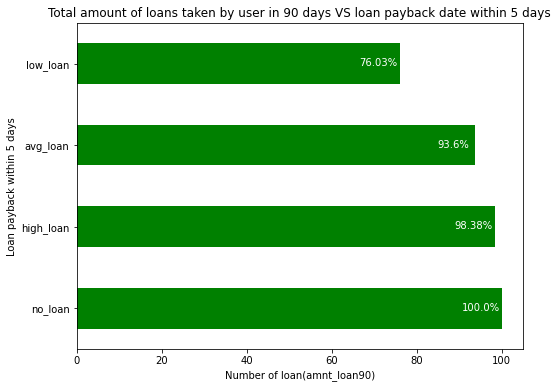

In [32]:
## Plotting the graph
plot_freq2= loan90_freq['subs%'].plot(kind='barh', color=('Green'), figsize=(8,6))
plt.title('Total amount of loans taken by user in 90 days VS loan payback date within 5 days')
plt.xlabel('Number of loan(amnt_loan90)')
plt.ylabel('Loan payback within 5 days')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq2.patches,loan90_freq['subs%'].sort_values(ascending = False).round(2).astype(str)):
    plot_freq2.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'white')

From the we can see that we can observe almost same results for the loan amount taken in 30 days.

<AxesSubplot:>

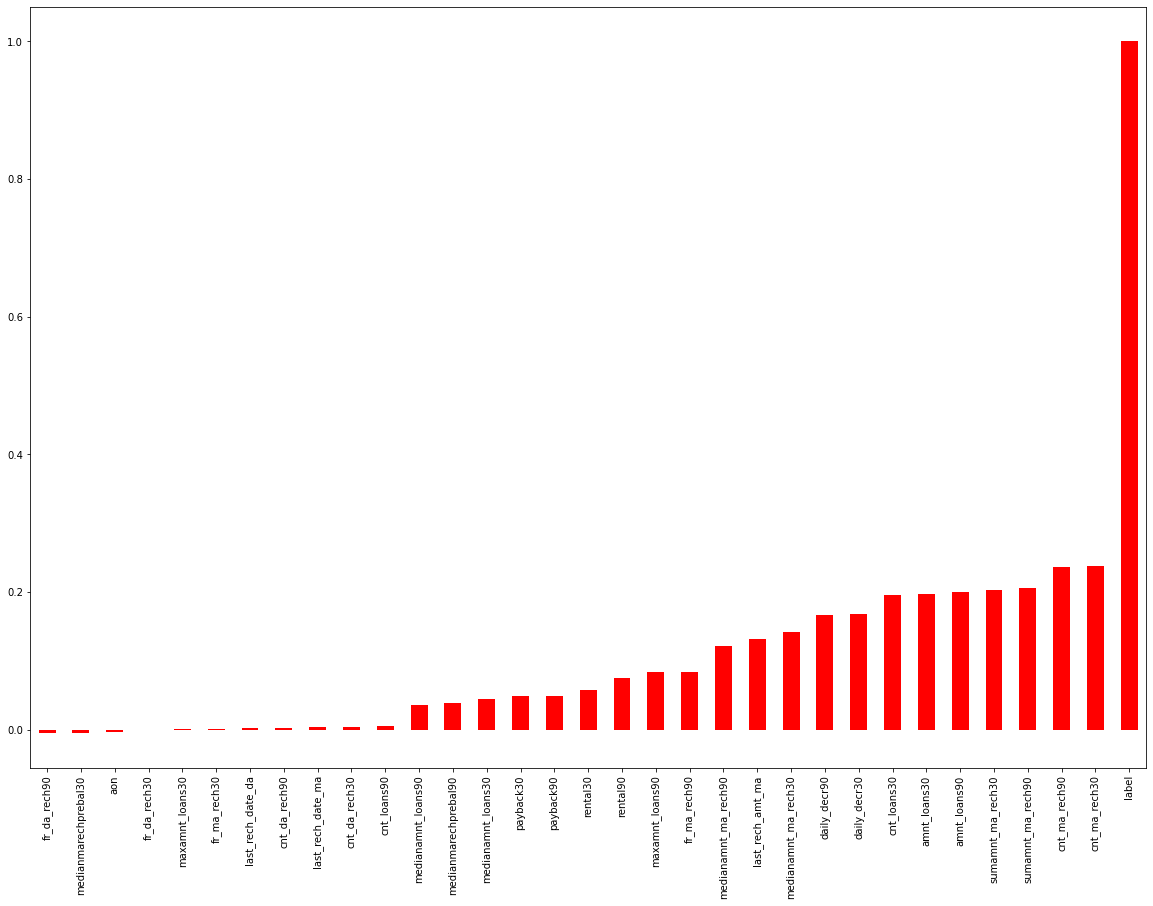

In [33]:
plt.figure(figsize = (20,14))
df.corr()['label'].sort_values().plot(kind ='bar',color='red')

In [34]:
# Checking the label corelation with other features
df.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

From the above we can see that there are few features which are not necessary with respect to label, so we can drop them.

In [35]:
## Dropping the negative correlated feautres and extra features created for visualization
df.drop(['msisdn', 'pcircle', 'pdate','fr_da_rech90', 'medianmarechprebal30', 'aon', 'fr_da_rech30', 'maxamnt_loans30', 'balance_group', 'frequency_group', 'loan_freq_group','loan90_freq_group'],axis=1,inplace=True)
#f.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_freq_group','loan90_freq_group'],axis=1,inplace=True)

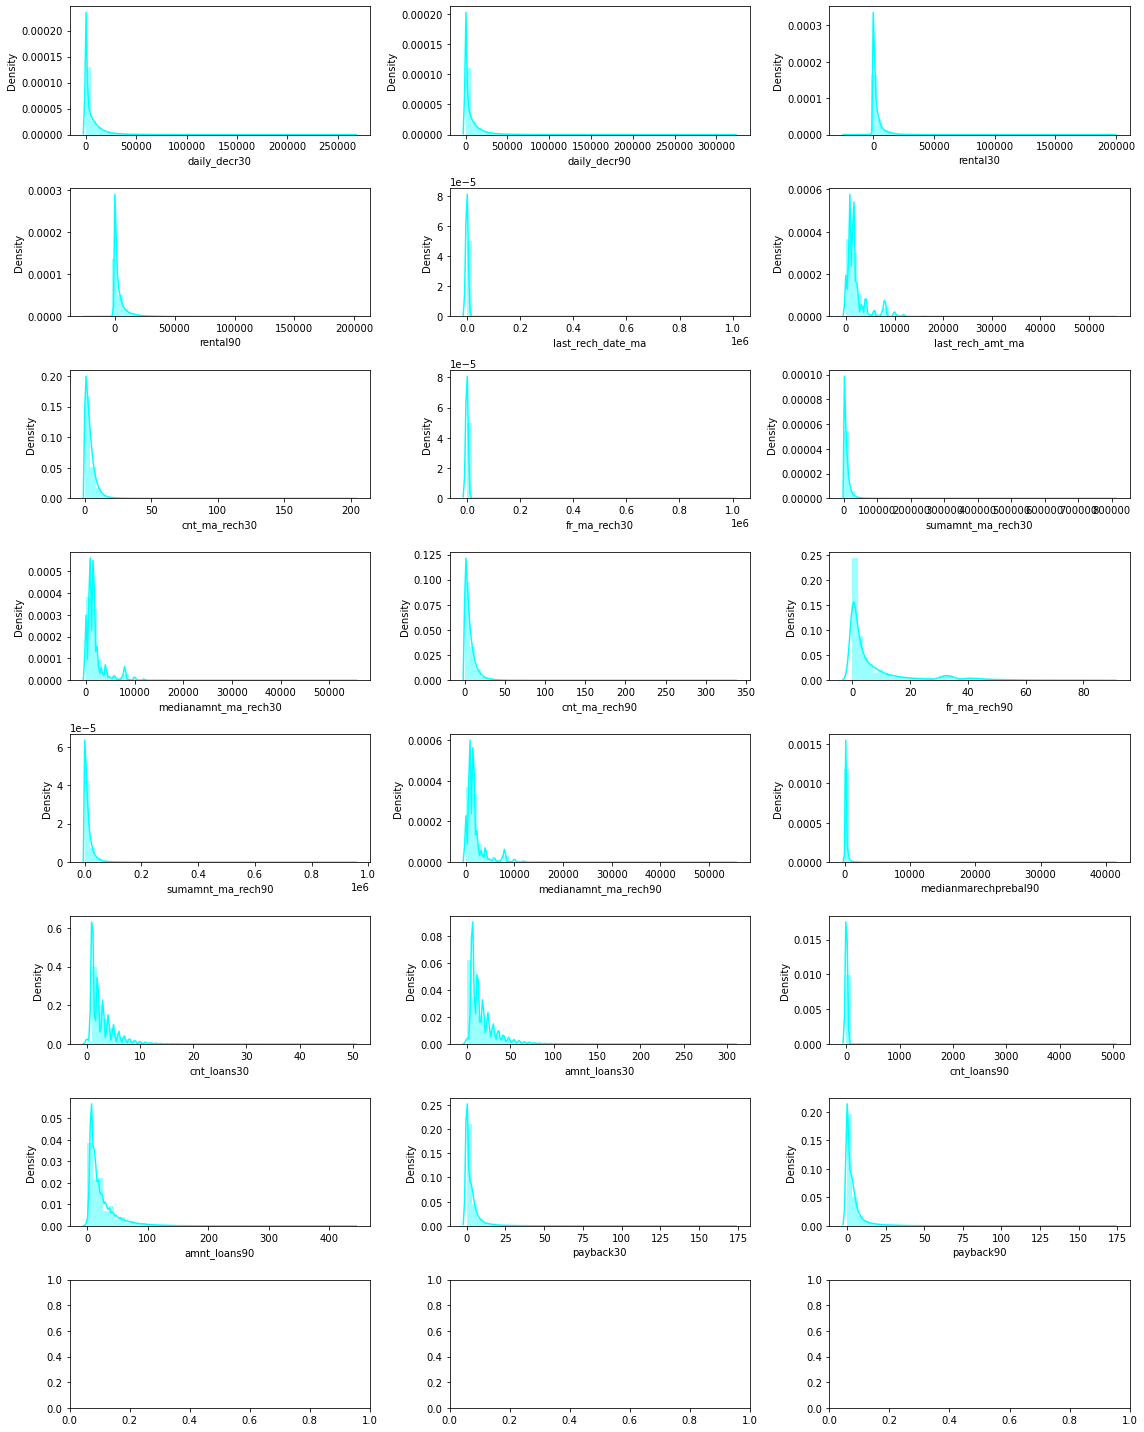

In [36]:
columns=['daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
         'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90','sumamnt_ma_rech90', 
         'medianamnt_ma_rech90', 'medianmarechprebal90','cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='cyan')
plt.tight_layout()
plt.show()

From the above we can see that most of the data is rightly skewed and there are multiple outliers in most of the features, so we have to deal with these outliers.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  cnt_ma_rech90         209593 non-null  int64  
 13  fr_ma_rech90          209593 non-null  int64  
 14  sumamnt_ma_rech90     209593 non-null  int64  
 15  

For this dataset i would chose outlier imputation technique for the features whose z-score>5, mean imputing, and also applied cube root to bring the data closer to normal distribution.

In [38]:
threashold=5
## Imputting outliers
from scipy.stats import zscore
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>5 or df[columns[i]][j]<-5:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
    df[columns[i]]=np.cbrt((df[columns[i]]))

1    183431
0     26162
Name: label, dtype: int64


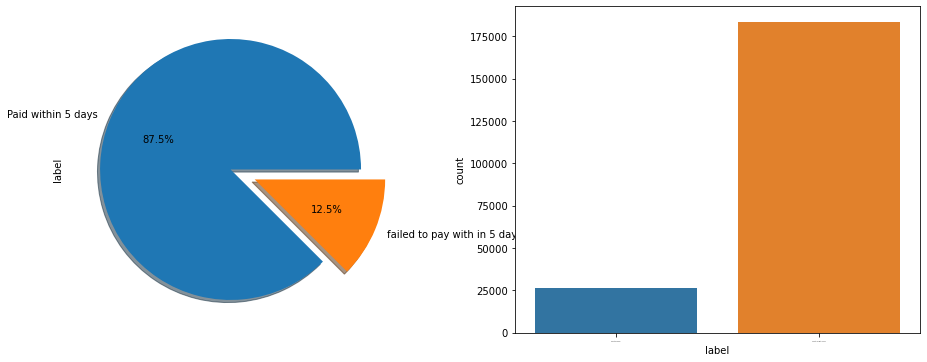

In [39]:
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Paid within 5 days', 'failed to pay with in 5 days']
df['label'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('label', data=df, ax=ax[1])
ax[1].set_xticklabels(['Paid within 5 days', 'failed to pay with in 5 days'], fontsize=0)
plt.show()

From the above we can see that the dataset is highly imbalanced as 87% paid in 5 days, and only 12% failed to payback, so we need to work on that or else our model will be more baised towards sucess and make false interpretation.

In [40]:
## Data Preprocessing

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [42]:
#Train and test split
Y = df['label']
X = df.drop('label',axis=1)

In [43]:
from imblearn.over_sampling import SMOTE

## Model Building

In [44]:
x=df.drop('label',axis=1)
y=df['label']

In [45]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()

In [46]:
x=scaller.fit_transform(x)

In [47]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [48]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()

In [49]:
x=scaller.fit_transform(x)

In [50]:
x

array([[-0.09031684, -0.0930996 , -0.11877582, ...,  0.        ,
         0.2039375 ,  0.1912099 ],
       [ 0.07184095,  0.06547368,  0.04898799, ...,  0.        ,
        -0.05804736, -0.05968668],
       [-0.11016061, -0.10990685, -0.10878423, ...,  0.        ,
        -0.10606811, -0.10906358],
       ...,
       [ 0.0714779 ,  0.06525356,  0.07264123, ...,  0.        ,
         0.03287932, -0.02911397],
       [ 0.02293714,  0.0210361 , -0.02023711, ...,  0.        ,
        -0.01820919,  0.02109288],
       [-0.03667008, -0.04164925, -0.06392959, ...,  0.        ,
        -0.05814248, -0.05978449]])

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.22,random_state=52)

In [53]:
lg=LogisticRegression()

In [54]:
lg.fit(train_x,train_y)

LogisticRegression()

In [55]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 ... 1 1 1]


## Results for imbalanced classes

In [56]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.877729825855002


In [57]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.62      0.05      0.09      5743
           1       0.88      1.00      0.93     40368

    accuracy                           0.88     46111
   macro avg       0.75      0.52      0.51     46111
weighted avg       0.85      0.88      0.83     46111



In [58]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [59]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))
auc_score

0.5213138270347074

In [60]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [61]:
import time
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lg, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.878016 using {'dual': False, 'max_iter': 140}
Execution time: 54.7500216960907 ms


In [62]:
df.drop(['label'],axis=1,inplace=True)

In [63]:
column_values=df.columns

# normalising the whole dataset from range 0 to 1

In [64]:
df=scaller.fit_transform(df)

In [65]:
df = pd.DataFrame(data = df,    
                  columns = column_values) 

In [66]:
df

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.090317,-0.093100,-0.118776,-0.117713,-0.058804,0.000000,-0.086499,-0.110715,-0.058703,-0.110037,...,0.000000,-0.095376,-0.100001,0.0,-0.059870,-0.108709,0.857593,0.0,0.203938,0.191210
1,0.071841,0.065474,0.048988,0.026338,-0.032757,0.000000,0.092692,-0.070800,-0.032815,-0.045775,...,0.000000,-0.070422,-0.055796,0.0,-0.034065,-0.060654,0.956989,0.0,-0.058047,-0.059687
2,-0.110161,-0.109907,-0.108784,-0.111476,-0.059947,0.000000,-0.088188,-0.129371,-0.059962,-0.123456,...,0.000000,-0.128681,-0.128626,0.0,-0.062247,-0.127298,0.874338,0.0,-0.106068,-0.109064
3,-0.119876,-0.118047,-0.120328,-0.119511,-0.058888,0.000000,-0.111782,-0.140436,-0.059103,-0.131069,...,0.000000,-0.095844,-0.100492,0.0,-0.060164,-0.109243,0.861806,0.0,-0.104548,-0.107500
4,-0.119384,-0.117674,-0.103522,-0.107417,-0.059322,0.000000,0.067634,0.128657,-0.059331,0.153907,...,0.000000,0.170764,0.160702,0.0,-0.053568,0.127646,0.865287,0.0,-0.071308,-0.083323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.122116,-0.120369,-0.106114,-0.110033,-0.060700,0.000000,0.139013,-0.090363,-0.060694,0.094906,...,0.000000,-0.098442,-0.103216,0.0,-0.061795,-0.112203,0.885162,0.0,-0.095606,-0.101140
209589,-0.125376,-0.123477,-0.091295,-0.101125,-0.061854,0.000000,-0.122809,0.025977,-0.061869,-0.115648,...,0.000000,0.068457,0.021094,0.0,-0.061689,-0.089842,0.902230,0.0,-0.097449,-0.103090
209590,0.071478,0.065254,0.072641,0.078759,-0.033104,0.000000,-0.048699,0.050017,-0.033089,0.043751,...,0.000000,0.063261,0.089672,0.0,-0.030732,0.084230,0.965659,0.0,0.032879,-0.029114
209591,0.022937,0.021036,-0.020237,-0.018927,-0.010292,0.950643,-0.020431,0.015549,-0.010290,0.019011,...,0.025017,-0.016693,0.003509,0.0,-0.010263,0.005942,0.300203,0.0,-0.018209,0.021093


In [67]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.46462291, 0.48560375, 0.75025339, ..., 0.22709142, 2.72904799,
        2.61068073],
       [1.12823193, 1.10433264, 0.88228236, ..., 0.22709142, 0.21668725,
        0.20252117],
       [0.65954562, 0.65412178, 0.65302366, ..., 0.22709142, 0.75662837,
        0.75616437],
       ...,
       [1.12466573, 1.10212562, 1.11245579, ..., 0.22709142, 0.80568452,
        0.14027824],
       [0.64785615, 0.65877884, 0.20864215, ..., 0.22709142, 0.23124977,
        0.70322729],
       [0.06234224, 0.03026371, 0.21653623, ..., 0.22709142, 0.21775681,
        0.20361787]])

## z score for removal of outliers

In [68]:
df_final=df[(z<3).all(axis=1)]

In [69]:
df.shape

(209593, 27)

In [70]:
df

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.090317,-0.093100,-0.118776,-0.117713,-0.058804,0.000000,-0.086499,-0.110715,-0.058703,-0.110037,...,0.000000,-0.095376,-0.100001,0.0,-0.059870,-0.108709,0.857593,0.0,0.203938,0.191210
1,0.071841,0.065474,0.048988,0.026338,-0.032757,0.000000,0.092692,-0.070800,-0.032815,-0.045775,...,0.000000,-0.070422,-0.055796,0.0,-0.034065,-0.060654,0.956989,0.0,-0.058047,-0.059687
2,-0.110161,-0.109907,-0.108784,-0.111476,-0.059947,0.000000,-0.088188,-0.129371,-0.059962,-0.123456,...,0.000000,-0.128681,-0.128626,0.0,-0.062247,-0.127298,0.874338,0.0,-0.106068,-0.109064
3,-0.119876,-0.118047,-0.120328,-0.119511,-0.058888,0.000000,-0.111782,-0.140436,-0.059103,-0.131069,...,0.000000,-0.095844,-0.100492,0.0,-0.060164,-0.109243,0.861806,0.0,-0.104548,-0.107500
4,-0.119384,-0.117674,-0.103522,-0.107417,-0.059322,0.000000,0.067634,0.128657,-0.059331,0.153907,...,0.000000,0.170764,0.160702,0.0,-0.053568,0.127646,0.865287,0.0,-0.071308,-0.083323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.122116,-0.120369,-0.106114,-0.110033,-0.060700,0.000000,0.139013,-0.090363,-0.060694,0.094906,...,0.000000,-0.098442,-0.103216,0.0,-0.061795,-0.112203,0.885162,0.0,-0.095606,-0.101140
209589,-0.125376,-0.123477,-0.091295,-0.101125,-0.061854,0.000000,-0.122809,0.025977,-0.061869,-0.115648,...,0.000000,0.068457,0.021094,0.0,-0.061689,-0.089842,0.902230,0.0,-0.097449,-0.103090
209590,0.071478,0.065254,0.072641,0.078759,-0.033104,0.000000,-0.048699,0.050017,-0.033089,0.043751,...,0.000000,0.063261,0.089672,0.0,-0.030732,0.084230,0.965659,0.0,0.032879,-0.029114
209591,0.022937,0.021036,-0.020237,-0.018927,-0.010292,0.950643,-0.020431,0.015549,-0.010290,0.019011,...,0.025017,-0.016693,0.003509,0.0,-0.010263,0.005942,0.300203,0.0,-0.018209,0.021093


In [71]:
from sklearn.utils import resample

In [72]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64>

In [73]:
df['label']=y
df_majority = df[df.label==1]
df_minority = df[df.label==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=183431,    # to match majority class
                                 random_state=7) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [74]:
df_upsampled

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
1,7.184095e-02,6.547368e-02,4.898799e-02,2.633752e-02,-3.275747e-02,0.0,9.269194e-02,-0.070800,-3.281518e-02,-0.045775,...,-0.070422,-0.055796,0.0,-3.406548e-02,-0.060654,0.956989,0.0,-0.058047,-0.059687,1
2,-1.101606e-01,-1.099069e-01,-1.087842e-01,-1.114761e-01,-5.994734e-02,0.0,-8.818786e-02,-0.129371,-5.996214e-02,-0.123456,...,-0.128681,-0.128626,0.0,-6.224678e-02,-0.127298,0.874338,0.0,-0.106068,-0.109064,1
3,-1.198758e-01,-1.180471e-01,-1.203284e-01,-1.195111e-01,-5.888804e-02,0.0,-1.117818e-01,-0.140436,-5.910273e-02,-0.131069,...,-0.095844,-0.100492,0.0,-6.016442e-02,-0.109243,0.861806,0.0,-0.104548,-0.107500,1
4,-1.193836e-01,-1.176744e-01,-1.035217e-01,-1.074167e-01,-5.932150e-02,0.0,6.763413e-02,0.128657,-5.933083e-02,0.153907,...,0.170764,0.160702,0.0,-5.356828e-02,0.127646,0.865287,0.0,-0.071308,-0.083323,1
5,-1.057047e-01,-1.068509e-01,-1.234347e-01,-1.233045e-01,-6.238147e-02,0.0,-9.176053e-02,0.026194,-6.233563e-02,-0.081047,...,0.069028,0.021270,0.0,-6.220388e-02,-0.090592,0.909759,0.0,0.144328,0.110704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117990,-9.763603e-02,-9.915358e-02,-9.797798e-02,-1.027876e-01,-5.896371e-02,0.0,-1.171289e-01,-0.087778,-5.890988e-02,-0.116121,...,-0.126547,-0.126493,0.0,-6.121455e-02,-0.125187,0.859839,0.0,-0.104309,-0.107255,0
69308,-1.061528e-01,-1.056380e-01,-1.039918e-01,-1.040123e-01,-5.712819e-02,0.0,2.080468e-01,-0.123473,-5.722883e-02,0.084765,...,-0.092806,-0.097306,0.0,-5.825686e-02,-0.105779,0.834482,0.0,-0.101233,-0.104092,0
119012,-1.010127e-01,-1.016621e-01,-1.062484e-01,-9.363579e-02,-5.878563e-02,0.0,-1.167752e-01,-0.110670,-5.866885e-02,-0.069108,...,-0.095337,-0.099960,0.0,-5.984577e-02,-0.108664,0.857242,0.0,-0.103994,0.232076,0
20566,-9.159757e-07,-9.542746e-07,-8.860102e-07,-7.742754e-07,-6.219238e-07,1.0,7.088841e-07,-0.000001,-6.211336e-07,-0.000001,...,-0.000001,-0.000001,0.0,-6.456646e-07,-0.000001,0.000009,0.0,-0.000001,-0.000001,0


In [75]:
df_upsampled.label.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [76]:
df_upsampled.label.isnull().sum()

0

In [77]:
y=df_upsampled.label
df_upsampled.drop(['label'],axis=1,inplace=True)
df_upsampled

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,7.184095e-02,6.547368e-02,4.898799e-02,2.633752e-02,-3.275747e-02,0.0,9.269194e-02,-0.070800,-3.281518e-02,-0.045775,...,0.0,-0.070422,-0.055796,0.0,-3.406548e-02,-0.060654,0.956989,0.0,-0.058047,-0.059687
2,-1.101606e-01,-1.099069e-01,-1.087842e-01,-1.114761e-01,-5.994734e-02,0.0,-8.818786e-02,-0.129371,-5.996214e-02,-0.123456,...,0.0,-0.128681,-0.128626,0.0,-6.224678e-02,-0.127298,0.874338,0.0,-0.106068,-0.109064
3,-1.198758e-01,-1.180471e-01,-1.203284e-01,-1.195111e-01,-5.888804e-02,0.0,-1.117818e-01,-0.140436,-5.910273e-02,-0.131069,...,0.0,-0.095844,-0.100492,0.0,-6.016442e-02,-0.109243,0.861806,0.0,-0.104548,-0.107500
4,-1.193836e-01,-1.176744e-01,-1.035217e-01,-1.074167e-01,-5.932150e-02,0.0,6.763413e-02,0.128657,-5.933083e-02,0.153907,...,0.0,0.170764,0.160702,0.0,-5.356828e-02,0.127646,0.865287,0.0,-0.071308,-0.083323
5,-1.057047e-01,-1.068509e-01,-1.234347e-01,-1.233045e-01,-6.238147e-02,0.0,-9.176053e-02,0.026194,-6.233563e-02,-0.081047,...,0.0,0.069028,0.021270,0.0,-6.220388e-02,-0.090592,0.909759,0.0,0.144328,0.110704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117990,-9.763603e-02,-9.915358e-02,-9.797798e-02,-1.027876e-01,-5.896371e-02,0.0,-1.171289e-01,-0.087778,-5.890988e-02,-0.116121,...,0.0,-0.126547,-0.126493,0.0,-6.121455e-02,-0.125187,0.859839,0.0,-0.104309,-0.107255
69308,-1.061528e-01,-1.056380e-01,-1.039918e-01,-1.040123e-01,-5.712819e-02,0.0,2.080468e-01,-0.123473,-5.722883e-02,0.084765,...,0.0,-0.092806,-0.097306,0.0,-5.825686e-02,-0.105779,0.834482,0.0,-0.101233,-0.104092
119012,-1.010127e-01,-1.016621e-01,-1.062484e-01,-9.363579e-02,-5.878563e-02,0.0,-1.167752e-01,-0.110670,-5.866885e-02,-0.069108,...,0.0,-0.095337,-0.099960,0.0,-5.984577e-02,-0.108664,0.857242,0.0,-0.103994,0.232076
20566,-9.159757e-07,-9.542746e-07,-8.860102e-07,-7.742754e-07,-6.219238e-07,1.0,7.088841e-07,-0.000001,-6.211336e-07,-0.000001,...,0.0,-0.000001,-0.000001,0.0,-6.456646e-07,-0.000001,0.000009,0.0,-0.000001,-0.000001


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [79]:
train_x,test_x,train_y,test_y = train_test_split(df_upsampled,y,random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
print("accuracy_score:",accuracy_score(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.7531292249989097
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     45713
           1       0.78      0.70      0.74     46003

    accuracy                           0.75     91716
   macro avg       0.76      0.75      0.75     91716
weighted avg       0.76      0.75      0.75     91716



In [81]:

df.drop(['label'],axis=1,inplace=True)
df

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.090317,-0.093100,-0.118776,-0.117713,-0.058804,0.000000,-0.086499,-0.110715,-0.058703,-0.110037,...,0.000000,-0.095376,-0.100001,0.0,-0.059870,-0.108709,0.857593,0.0,0.203938,0.191210
1,0.071841,0.065474,0.048988,0.026338,-0.032757,0.000000,0.092692,-0.070800,-0.032815,-0.045775,...,0.000000,-0.070422,-0.055796,0.0,-0.034065,-0.060654,0.956989,0.0,-0.058047,-0.059687
2,-0.110161,-0.109907,-0.108784,-0.111476,-0.059947,0.000000,-0.088188,-0.129371,-0.059962,-0.123456,...,0.000000,-0.128681,-0.128626,0.0,-0.062247,-0.127298,0.874338,0.0,-0.106068,-0.109064
3,-0.119876,-0.118047,-0.120328,-0.119511,-0.058888,0.000000,-0.111782,-0.140436,-0.059103,-0.131069,...,0.000000,-0.095844,-0.100492,0.0,-0.060164,-0.109243,0.861806,0.0,-0.104548,-0.107500
4,-0.119384,-0.117674,-0.103522,-0.107417,-0.059322,0.000000,0.067634,0.128657,-0.059331,0.153907,...,0.000000,0.170764,0.160702,0.0,-0.053568,0.127646,0.865287,0.0,-0.071308,-0.083323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.122116,-0.120369,-0.106114,-0.110033,-0.060700,0.000000,0.139013,-0.090363,-0.060694,0.094906,...,0.000000,-0.098442,-0.103216,0.0,-0.061795,-0.112203,0.885162,0.0,-0.095606,-0.101140
209589,-0.125376,-0.123477,-0.091295,-0.101125,-0.061854,0.000000,-0.122809,0.025977,-0.061869,-0.115648,...,0.000000,0.068457,0.021094,0.0,-0.061689,-0.089842,0.902230,0.0,-0.097449,-0.103090
209590,0.071478,0.065254,0.072641,0.078759,-0.033104,0.000000,-0.048699,0.050017,-0.033089,0.043751,...,0.000000,0.063261,0.089672,0.0,-0.030732,0.084230,0.965659,0.0,0.032879,-0.029114
209591,0.022937,0.021036,-0.020237,-0.018927,-0.010292,0.950643,-0.020431,0.015549,-0.010290,0.019011,...,0.025017,-0.016693,0.003509,0.0,-0.010263,0.005942,0.300203,0.0,-0.018209,0.021093


In [82]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))
auc_score

0.7532826555712425

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dct=DecisionTreeClassifier()
dct.fit(train_x,train_y)
preddct=dct.predict(test_x)

In [85]:
print(classification_report(test_y,preddct))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45713
           1       1.00      0.90      0.94     46003

    accuracy                           0.95     91716
   macro avg       0.95      0.95      0.95     91716
weighted avg       0.95      0.95      0.95     91716



In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_predict=rf.predict(test_x) 

In [87]:
rf_conf_matrix = confusion_matrix(test_y, rf_predict)
rf_acc_score = accuracy_score(test_y, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[45581   132]
 [ 2663 43340]]
0.969525491735357


In [88]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))


0.7526058702952593
[[35605 10108]
 [12582 33421]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     45713
           1       0.77      0.73      0.75     46003

    accuracy                           0.75     91716
   macro avg       0.75      0.75      0.75     91716
weighted avg       0.75      0.75      0.75     91716



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)
predknn
print(classification_report(test_y,predknn))


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(predgnb,test_y))
print(classification_report(test_y,predgnb))

# hypertuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.75]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(train_x,train_y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(train_x,train_y)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(test_x,test_y)))
    print()

In [ ]:
accuracy = []
precision = []
recall = []
f1_score = []
logLoss = []
Auc_roc_score=[]
cvs=[]

def calculate_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    pre = metrics.precision_score(y_true = y_test, y_pred = y_pred)
    rec = metrics.recall_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred)
    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    
    
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f1_score.append(f1)
    logLoss.append(log_loss)

In [ ]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
LR_prediction=LR.predict(x_test)
calculate_metrics(y_test, LR_prediction)
LR_roc = roc_auc_score(y_test, LR_prediction)
Auc_roc_score.append(LR_roc)
cvs.append(cross_val_score(LR, x_res, y_res, cv=3).mean())

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_prediction=DT.predict(x_test)
calculate_metrics(y_test, DT_prediction)
DT_roc = roc_auc_score(y_test, DT_prediction)
Auc_roc_score.append(DT_roc)
cvs.append(cross_val_score(DT, x_res, y_res, cv=3).mean())

In [ ]:
GNB=GaussianNB()
GNB.fit(x_train, y_train)
GNB_prediction=GNB.predict(x_test)
calculate_metrics(y_test, GNB_prediction)
GNB_roc = roc_auc_score(y_test, GNB_prediction)
Auc_roc_score.append(GNB_roc)
cvs.append(cross_val_score(GNB, x_res, y_res, cv=3).mean())

In [ ]:
RNDC=RandomForestClassifier()
RNDC.fit(x_train, y_train)
RNDC_prediction = RNDC.predict(x_test)
calculate_metrics(y_test, RNDC_prediction)
RNDC_roc = roc_auc_score(y_test, RNDC_prediction)
Auc_roc_score.append(RNDC_roc)
cvs.append(cross_val_score(RNDC, x_res, y_res, cv=3).mean())

In [ ]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train, y_train)
GBC_prediction=GBC.predict(x_test)
calculate_metrics(y_test, GBC_prediction)
GBC_roc = roc_auc_score(y_test, GBC_prediction)
Auc_roc_score.append(LR_roc)
cvs.append(cross_val_score(GBC, x_res, y_res, cv=3).mean())

In [ ]:
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
ABC_prediction=ABC.predict(x_test)
calculate_metrics(y_test, ABC_prediction)
ABC_roc = roc_auc_score(y_test, ABC_prediction)
Auc_roc_score.append(ABC_roc)
cvs.append(cross_val_score(ABC, x_res, y_res, cv=3).mean())

In [ ]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train, y_train)
ETC_prediction=ETC.predict(x_test)
calculate_metrics(y_test, ETC_prediction)
ETC_roc = roc_auc_score(y_test, ETC_prediction)
Auc_roc_score.append(ETC_roc)
cvs.append(cross_val_score(ETC, x_res, y_res, cv=3).mean())

In [ ]:
results = pd.DataFrame(data = {'accuracy':accuracy, 'precision': precision ,
                               'recall': recall,'f1_score': f1_score,'Roc':Auc_roc_score,'Cross Val':cvs},
             index = ['LogisticRegression','DecisionTreeClassifier','GaussianNB',"Random Forest",'GradientBoostingClassifier','AdaBoostClassifier','ExtraTreesClassifier'] )
results

## HyperParameter Tunning¶

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params4 = {
    'n_estimators': range(50,200,25),
    'max_features': range(1,13,2),
    'min_samples_leaf': range(2,10,1),
    'min_samples_split': range(2,10,1),
}


In [ ]:
r_search3=RandomizedSearchCV(ETC,param_distributions=params4,n_iter=10,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [ ]:
r_search3.fit(x_train,y_train)

In [ ]:
r_search3.best_score_

In [ ]:
model1=ExtraTreesClassifier(**r_search3.best_params_)
model1.fit(x_train,y_train)